In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import *
import time

In [2]:
df_train = pd.read_csv('train-v3.csv')
df_valid = pd.read_csv('valid-v3.csv')
df_test = pd.read_csv('test-v3.csv')

In [3]:
df_train.describe(include='all')

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.296700e+04,1.296700e+04,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,...,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000
mean,4.588968e+09,5.373833e+05,2014.322511,6.572068,15.729930,3.362381,2.106058,2071.295057,1.499539e+04,1.442893,...,7.646025,1781.741806,289.553251,1970.766947,82.948870,98078.459166,47.558910,-122.214565,1980.143672,12796.538290
std,2.877996e+09,3.668840e+05,0.467455,3.107792,8.619505,0.941124,0.765280,919.355180,3.875191e+04,0.551628,...,1.171189,826.580915,440.742634,29.472777,398.333729,53.525055,0.138978,0.140481,683.572323,27429.856166
min,1.000102e+06,7.500000e+04,2014.000000,1.000000,1.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,399.000000,659.000000
25%,2.134110e+09,3.199500e+05,2014.000000,4.000000,8.000000,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470450,-122.330000,1480.000000,5100.000000
50%,3.905000e+09,4.470000e+05,2014.000000,6.000000,16.000000,3.000000,2.250000,1900.000000,7.620000e+03,1.000000,...,7.000000,1550.000000,0.000000,1974.000000,0.000000,98065.000000,47.569900,-122.232000,1830.000000,7625.000000
75%,7.326850e+09,6.370000e+05,2015.000000,9.000000,23.000000,4.000000,2.500000,2540.000000,1.063400e+04,2.000000,...,8.000000,2200.000000,560.000000,1996.000000,0.000000,98118.000000,47.677300,-122.125000,2350.000000,10051.000000
max,9.900000e+09,7.062500e+06,2015.000000,12.000000,31.000000,33.000000,8.000000,13540.000000,1.024068e+06,3.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df_valid.describe(include='all')

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+03,2.161000e+03,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,...,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000
mean,4.571687e+09,5.294618e+05,2014.334567,6.525220,15.833410,3.372513,2.121240,2063.294308,14320.459047,1.434984,...,7.629801,1766.445164,296.849144,1971.723276,88.733919,98077.072189,47.559667,-122.213437,1976.409070,12408.874132
std,2.872324e+09,3.428886e+05,0.471948,3.148991,8.730057,0.916194,0.782065,900.540401,34774.974082,0.559065,...,1.140549,810.910482,449.252068,29.081626,411.651953,53.562004,0.140347,0.146108,682.282485,24617.115450
min,1.200019e+06,9.900000e+04,2014.000000,1.000000,1.000000,0.000000,0.750000,470.000000,690.000000,1.000000,...,4.000000,470.000000,0.000000,1900.000000,0.000000,98001.000000,47.179500,-122.490000,670.000000,809.000000
25%,2.076400e+09,3.250000e+05,2014.000000,4.000000,8.000000,3.000000,1.750000,1420.000000,5000.000000,1.000000,...,7.000000,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.458900,-122.332000,1480.000000,5040.000000
50%,3.876312e+09,4.500000e+05,2014.000000,6.000000,16.000000,3.000000,2.250000,1920.000000,7560.000000,1.000000,...,7.000000,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.574000,-122.231000,1830.000000,7557.000000
75%,7.237501e+09,6.330000e+05,2015.000000,9.000000,24.000000,4.000000,2.500000,2510.000000,10800.000000,2.000000,...,8.000000,2150.000000,570.000000,1998.000000,0.000000,98117.000000,47.679000,-122.119000,2340.000000,10030.000000
max,9.842300e+09,4.500000e+06,2015.000000,12.000000,31.000000,10.000000,7.500000,7350.000000,982278.000000,3.000000,...,12.000000,6370.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777100,-121.315000,5790.000000,560617.000000


In [5]:
df_train = df_train[df_train.bedrooms < 10]

In [6]:
df_train.describe(include='all')

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.296300e+04,1.296300e+04,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,1.296300e+04,12963.000000,...,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000
mean,4.589333e+09,5.373202e+05,2014.322611,6.571473,15.727918,3.358482,2.105705,2070.998457,1.499804e+04,1.442876,...,7.646070,1781.689887,289.308571,1970.774435,82.820258,98078.458844,47.558890,-122.214544,1980.192317,12798.650544
std,2.877820e+09,3.668987e+05,0.467493,3.107851,8.619524,0.898280,0.764813,919.155832,3.875756e+04,0.551642,...,1.171268,826.640575,440.459001,29.466758,398.037540,53.527830,0.138992,0.140487,683.602872,27433.786308
min,1.000102e+06,7.500000e+04,2014.000000,1.000000,1.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,399.000000,659.000000
25%,2.137950e+09,3.199500e+05,2014.000000,4.000000,8.000000,3.000000,1.500000,1420.000000,5.041000e+03,1.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470400,-122.330000,1480.000000,5100.000000
50%,3.905000e+09,4.470000e+05,2014.000000,6.000000,16.000000,3.000000,2.250000,1900.000000,7.620000e+03,1.000000,...,7.000000,1550.000000,0.000000,1974.000000,0.000000,98065.000000,47.569900,-122.232000,1830.000000,7625.000000
75%,7.326850e+09,6.361650e+05,2015.000000,9.000000,23.000000,4.000000,2.500000,2540.000000,1.063400e+04,2.000000,...,8.000000,2200.000000,560.000000,1996.000000,0.000000,98118.000000,47.677300,-122.125000,2350.000000,10051.000000
max,9.900000e+09,7.062500e+06,2015.000000,12.000000,31.000000,9.000000,8.000000,13540.000000,1.024068e+06,3.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
age = df_train['sale_yr'] - df_train['yr_built']
df_train['age'] = age

age = df_valid['sale_yr'] - df_valid['yr_built']
df_valid['age'] = age

age = df_test['sale_yr'] - df_test['yr_built']
df_test['age'] = age

In [8]:
df_train = df_train.drop(['sale_yr', 'yr_built', 'sale_day'], axis=1)
df_valid = df_valid.drop(['sale_yr', 'yr_built', 'sale_day'], axis=1)
df_test = df_test.drop(['sale_yr', 'yr_built', 'sale_day'], axis=1)

In [9]:
df_train = df_train[df_train.sqft_living < 7000]
df_valid = df_valid[df_valid.sqft_living < 7000]

In [10]:
train_x = df_train.drop(['price', 'id'], axis=1).values
train_y = df_train['price'].values

valid_x = df_valid.drop(['price', 'id'], axis=1).values
valid_y = df_valid['price'].values

test = df_test.drop(['id'],axis=1).values

In [11]:
train_x.shape

(12944, 19)

In [12]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
valid_x = scaler.transform(valid_x)
test = scaler.transform(test)

In [19]:
model = Sequential()
model.add(Dense(180, kernel_initializer='normal', input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(120, kernel_initializer='normal', activation='relu'))
model.add(Dense(60, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [20]:
model.compile(loss='MAE',optimizer='adam',metrics=['accuracy'])

In [21]:
epochs=200
batch_size=32
Name = 'House Price Prediction-{}_{}-{}'.format(epochs, batch_size, int(time.time()))
history = model.fit(train_x, train_y,
          batch_size, 
          epochs, 
          verbose=2,
          validation_data=(valid_x, valid_y))

Train on 12944 samples, validate on 2160 samples
Epoch 1/200
12944/12944 - 1s - loss: 360300.2844 - accuracy: 0.0000e+00 - val_loss: 167331.5854 - val_accuracy: 0.0000e+00
Epoch 2/200
12944/12944 - 1s - loss: 137145.0344 - accuracy: 0.0000e+00 - val_loss: 119440.0791 - val_accuracy: 0.0000e+00
Epoch 3/200
12944/12944 - 1s - loss: 112033.6835 - accuracy: 0.0000e+00 - val_loss: 111094.0078 - val_accuracy: 0.0000e+00
Epoch 4/200
12944/12944 - 1s - loss: 107481.9301 - accuracy: 0.0000e+00 - val_loss: 108228.4767 - val_accuracy: 0.0000e+00
Epoch 5/200
12944/12944 - 1s - loss: 105960.6945 - accuracy: 0.0000e+00 - val_loss: 107877.9461 - val_accuracy: 0.0000e+00
Epoch 6/200
12944/12944 - 1s - loss: 104744.9472 - accuracy: 0.0000e+00 - val_loss: 106343.8703 - val_accuracy: 0.0000e+00
Epoch 7/200
12944/12944 - 1s - loss: 103951.6958 - accuracy: 0.0000e+00 - val_loss: 105909.6178 - val_accuracy: 0.0000e+00
Epoch 8/200
12944/12944 - 1s - loss: 103302.1818 - accuracy: 0.0000e+00 - val_loss: 104444

Epoch 68/200
12944/12944 - 1s - loss: 88435.8880 - accuracy: 0.0000e+00 - val_loss: 89177.6810 - val_accuracy: 0.0000e+00
Epoch 69/200
12944/12944 - 1s - loss: 88021.2440 - accuracy: 0.0000e+00 - val_loss: 88345.9742 - val_accuracy: 0.0000e+00
Epoch 70/200
12944/12944 - 1s - loss: 87488.6129 - accuracy: 0.0000e+00 - val_loss: 88036.7343 - val_accuracy: 0.0000e+00
Epoch 71/200
12944/12944 - 1s - loss: 87143.7713 - accuracy: 0.0000e+00 - val_loss: 87423.0323 - val_accuracy: 0.0000e+00
Epoch 72/200
12944/12944 - 1s - loss: 86459.8338 - accuracy: 0.0000e+00 - val_loss: 86883.1466 - val_accuracy: 0.0000e+00
Epoch 73/200
12944/12944 - 1s - loss: 86211.0212 - accuracy: 0.0000e+00 - val_loss: 86037.1025 - val_accuracy: 0.0000e+00
Epoch 74/200
12944/12944 - 1s - loss: 85352.1681 - accuracy: 0.0000e+00 - val_loss: 86389.4358 - val_accuracy: 0.0000e+00
Epoch 75/200
12944/12944 - 1s - loss: 85011.8929 - accuracy: 0.0000e+00 - val_loss: 86028.1519 - val_accuracy: 0.0000e+00
Epoch 76/200
12944/12944

Epoch 135/200
12944/12944 - 1s - loss: 66652.4383 - accuracy: 0.0000e+00 - val_loss: 67533.2072 - val_accuracy: 0.0000e+00
Epoch 136/200
12944/12944 - 1s - loss: 66173.5939 - accuracy: 0.0000e+00 - val_loss: 68979.0398 - val_accuracy: 0.0000e+00
Epoch 137/200
12944/12944 - 1s - loss: 66359.1578 - accuracy: 0.0000e+00 - val_loss: 69083.0234 - val_accuracy: 0.0000e+00
Epoch 138/200
12944/12944 - 1s - loss: 65851.6179 - accuracy: 0.0000e+00 - val_loss: 67435.6140 - val_accuracy: 0.0000e+00
Epoch 139/200
12944/12944 - 1s - loss: 65897.1449 - accuracy: 0.0000e+00 - val_loss: 68364.5175 - val_accuracy: 0.0000e+00
Epoch 140/200
12944/12944 - 1s - loss: 65835.9771 - accuracy: 0.0000e+00 - val_loss: 67916.8608 - val_accuracy: 0.0000e+00
Epoch 141/200
12944/12944 - 1s - loss: 65663.0357 - accuracy: 0.0000e+00 - val_loss: 67314.3224 - val_accuracy: 0.0000e+00
Epoch 142/200
12944/12944 - 1s - loss: 65329.7259 - accuracy: 0.0000e+00 - val_loss: 68143.8703 - val_accuracy: 0.0000e+00
Epoch 143/200
12

In [22]:
predict = model.predict(test)
predict = pd.DataFrame(predict)
predict.index += 1
predict.index.name ='id'

In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history, title, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

show_train_history(history, 'Accuracy', 'accuracy', 'val_accuracy')
show_train_history(history, 'Loss', 'loss', 'val_loss')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

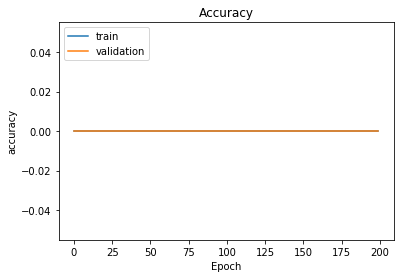

In [24]:
show_train_history(history, 'Accuracy', 'accuracy', 'val_accuracy')

In [17]:
fn = '{}_{}-{}'.format(epochs, batch_size, int(time.time()))
predict.to_csv('test-'+fn+'.csv', header=['price'])

In [18]:
model.save(Name + '.h5')